# ACN-Sim Tutorial: Lesson 1
## Running an Experiment
### by Zachary Lee
#### Last updated: 03/19/2019

In this first lesson we will learn how to setup and run a simulation using a built-in scheduling algorithm.
After running the simulation we will learn how to use the analysis subpackage to analyze the results of the simulation.

In [15]:
import pytz
from datetime import datetime
from matplotlib import pyplot as plt

from acnportal.acnsim import Simulator
from acnportal.acnsim.network.sites import CaltechACN
from acnportal.acnsim.events import c2api
from acnsim.analysis import *
from acnportal.algorithms import UncontrolledCharging


### Experiment Parameters 



In [16]:
# Timezone of the ACN we are using.
timezone = pytz.timezone('America/Los_Angeles')

# Start and End times are used when collecting data.
start = datetime(2018, 9, 5).astimezone(timezone)
end = datetime(2018, 9, 6).astimezone(timezone)

# How long each time discrete time interval in the simulation should be.
period = 5  # minutes

# Voltage of the network.
voltage = 220  # volts

# Default maximum charging rate for each EV.
max_rate = 32 # amps

# Identifier of the site where data will be gathered.
site = 'caltech'

### Network 

In [17]:
# For this experiment we use the predefined CaltechACN network.
cn = CaltechACN(basic_evse=True)

### Events

In this case we will use the Caltech Charging Dataset API to download real events from the time period of our
simulation.

In [18]:
# For this tutorial we will use a demonstration token to access the API, but when using real simulations you will
# want to register for your own free API token at ev.caltech.edu/dataset.html.
API_KEY = 'DEMO_TOKEN'

# An EventQueue is a special container which stores the events for the simulation. In this case we use the c2api utility
# to pre-fill the event queue based on real events in the Caltech Charging Dataset.
events = c2api.generate_events(API_KEY, site, start, end, period, voltage, max_rate)

### Scheduling Algorithm

In this case we will use the Caltech Charging Dataset API to download real events from the time period of our
simulation.

In [19]:
# For this simple experiment we will use the predefined Uncontrolled Charging algorithm. We will cover more advanced
# algorithms and how to define a custom algorithm in future tutorials.
sch = UncontrolledCharging()

### Simulator

We can now load the simulator enviroment with the network, scheduler, and events we have already defined.

In [20]:
sim = Simulator(cn, sch, events, start, period=period, max_recomp=1)

To execute the simulation we simply call the run() function.

In [21]:
sim.run()

Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Unplug Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Plugin Event...
Unplug Event...
Plugin Event...
Plugin Event...
Plugin Event...
Unplug Event...
Unplug Event...
Unplug Event...
Plugin Event...
Unplug Event...
Plugin Event...
Plugin Event...
Unplug Event...
Unplug Event...
Unplug Event...
Plugin Event...
Unplug Event...
Plugin E

### Analysis

After running the simulation, we can analyze the results using data stored in the simulator.

In [22]:
# Find percentage of requested energy which was delivered.
total_energy_prop = proportion_of_energy_delivered(sim)
print('Proportion of requested energy delivered: {0}'.format(total_energy_prop))

Proportion of requested energy delivered: 1.0


In [23]:
# Find peak aggregate current during the simulation
print('Peak aggregate current: {0} A'.format(sim.peak))

Peak aggregate current: 704 A


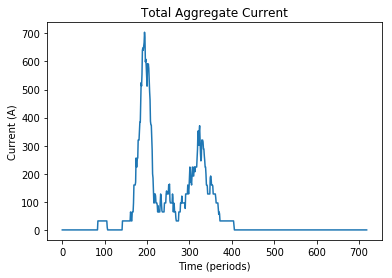

In [24]:
# Plotting aggregate current
agg_current = aggregate_current(sim)
plt.plot(agg_current)
plt.xlabel('Time (periods)')
plt.ylabel('Current (A)')
plt.title('Total Aggregate Current')
plt.show()